## Bài 3.3
Với dữ liệu cho trong ví dụ 3.1
- a. Tìm các khoảng tin cậy đồng thời 95% T2 cho nuy1, nuy2, nuy3
- b. Tìm các khoảng tin cậy đồng thời Bonferroni 95% cho nuy1, nuy2, nuy3
- c. So sánh kết quả ở câu a và b

In [ ]:
base_path = getwd()
setwd(base_path)
path = paste(base_path, "Data/data_exo_chap4/exo4-6.dat", sep = "/")

In [1]:
base_path = "/Users/hoapham/Documents/Cá Nhân/Cao Học/Tài liệu học tập/Học Phầnn 1/4. Thống Kê Nhiều Chiều/Project"


In [2]:
setwd(base_path)

ERROR: Error in setwd(base_path): cannot change working directory


In [ ]:

path = paste(base_path, "Chapter3/T5-1.dat", sep = "/")

In [ ]:
df=read.table(path)
head(df)

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,3.7,48.5,9.3
2,5.7,65.1,8.0
3,3.8,47.2,10.9
4,3.2,53.2,12.0
5,3.1,55.5,9.7
6,4.6,36.1,7.9


In [ ]:
names(df)=c("rate","sodium","potas")
n=nrow(df)
p=ncol(df)
dim(df)

[1] 20  3

In [ ]:
(xbar=colMeans(df))


rate sodium  potas 
 4.640 45.400  9.965

In [ ]:
(S=cov(df))

,rate,sodium,potas
rate,2.879368,10.0100,-1.809053
sodium,10.010000,199.7884,-5.640000
potas,-1.809053,-5.6400,3.627658


In [ ]:
(solve(S))

,rate,sodium,potas
rate,0.58615531,-0.022085719,0.257968742
sodium,-0.02208572,0.006067227,-0.001580929
potas,0.25796874,-0.001580929,0.401846765


In [ ]:
#eigenvalue and eigenvector pairs for S
eig=eigen(S)
eig$values
eig$vectors

[1] 200.462464   4.531591   1.301392

-0.05084144,-0.57370364,0.81748351
-0.99828352,0.05302042,-0.02487655
0.02907156,0.81734508,0.57541452


- a. Tìm các khoảng tin cậy đồng thời 95% T^2 cho nuy1, nuy2, nuy3

In [ ]:
#Tìm F(p, n-p) với alpha = 0.05
f = qf(0.95,p,n-p)
# Tìm c:
c = sqrt(
    (p*(n-1)*f)/(n-p)
    )
c

[1] 3.273928

In [ ]:
# Chọn a
a = diag(3)
a

1,0,0
0,1,0
0,0,1


In [ ]:
# Tìm Khoảng tin cậy đồng thời T2 cho nuy1, nuy2, nuy3
# Áp dụng công thức số 12 ta được:
T2_ktc = c()
for (i in 1:3)
{
value = c(
    t(a[i,])%*%xbar - c*sqrt(t(a[i,])%*%S%*%a[i,]/n),
    t(a[i,])%*%xbar + c*sqrt(t(a[i,])%*%S%*%a[i,]/n)
    )
#  Tên 
names(value)= c(names(df)[i], names(df)[i])
T2_ktc = append(T2_ktc,value)
}
print("Vậy khoảng tin cậy đồng thời T2 cho nuy1, nuy2, nuy3 là:")
T2_ktc

[1] "Vậy khoảng tin cậy đồng thời T2 cho nuy1, nuy2, nuy3 là:"


rate      rate    sodium    sodium     potas     potas 
 3.397768  5.882232 35.052408 55.747592  8.570664 11.359336

- b. Tìm các khoảng tin cậy đồng thời Bonferroni 95% cho nuy1, nuy2, nuy3

In [ ]:
t = qt(1-(1-0.95)/(2*p),n-1)
t

[1] 2.625106

In [ ]:
bf_ktc = c()
for(i in 1:3)
{
value = c(
    xbar[i] - t*sqrt(S[i,i]/n),
    xbar[i] + t*sqrt(S[i,i]/n)
    )
names(value)= c(names(df)[i], names(df)[i])
bf_ktc = append(bf_ktc,value)
}
bf_ktc

rate      rate    sodium    sodium     potas     potas 
 3.643952  5.636048 37.103078 53.696922  8.846992 11.083008

##### c. Nhận xét:
- Với cùng độ tin cậy 95% ta thấy khoảng tin cậy đồng thời T2 có chứa khoảng tin cậy đồng thời Bonferroni nghĩa là khoảng tin cậy đồng thời ở câu b (Bonferroni) tốt hơn khoảng tin cậy đồng thời T2 ở câu a

## Bài 3.4
- Xét các véc tờ Xi độc lập và có cùng phân phối N2(nuy, xích ma). Với các quan trắc xi...x42, ta được trung bình mẫu
- x_tb = (0.564, 0.603)'
- S = [
    [0.0144, 0.0117],
    [0.0117, 0.0146]
    ]

Tìm miền tin cậy kích thước alpha cho nuy = (nuy1, nuy2)'
- a. Tìm ước lượng hợp lý cực đại cho xích ma
- b. Xác định miền tin cậy Ellipse, R1 cho nuy
- c. nuy1 = (0.60, 0.58) có năm ftrong R1 không?
- d. TÌm các khoảng tin cậy đồng thời cho nuy1 và nuy2. Miền tin cậy tương ứng gọi là R2.
- e. Kiểm định:
- H0: nuy =(0.60, 0.58), so với H1: H0 không đúng

In [ ]:
library(ellipse)


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




In [ ]:
p = 2
n = 42

In [ ]:
cells_x = c(0.564, 0.603)
xbar = matrix(cells_x, 2,1)
xbar

0.564
0.603


In [ ]:
cells_s = c(0.0144, 0.0117, 0.0117, 0.0146)
S = matrix(cells_s, 2,2)
S

0.0144,0.0117
0.0117,0.0146


- a. Tìm ước lượng hợp lý cực đại cho xichma

In [ ]:
# Áp dụng định lý 2.2.1 ta có ước lượng hợp lý cực đại cho xichma:
S_inv = solve(S)
S_inv

199.0457,-159.5092
-159.5092,196.3190


- b. Xác định miền tin cậy Ellipse, R1 cho nuy

In [ ]:
# Tìm c2
f = qf(0.95,p,n-p)
# Tìm c:
c2 = 
    (p*(n-1)*f)/(n-p)/n
    

[1] 0.5163403

[1] 0.6116597

[1] 0.5550105

[1] 0.6509895

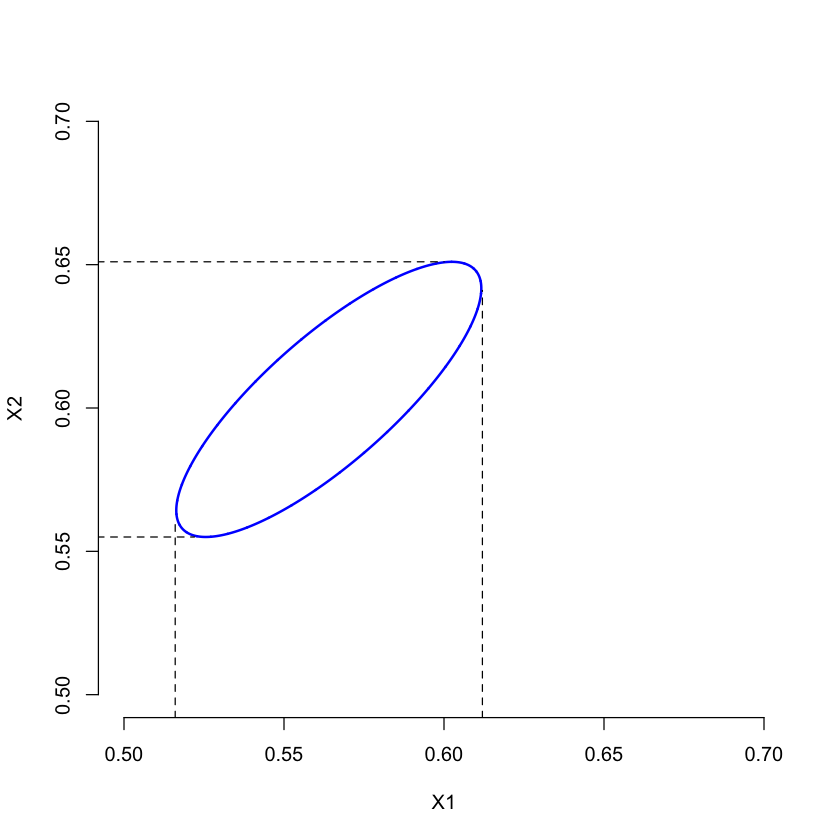

In [ ]:
# Miền tin cậy Ellipse R1 cho nuy
# Với x1
xbar[1]-sqrt(c2*S[1,1]) ##equ 5-24
xbar[1]+sqrt(c2*S[1,1])
# Với x2
xbar[2]-sqrt(c2*S[2,2])
xbar[2]+sqrt(c2*S[2,2])

eli = ellipse(S, centre=xbar,t=sqrt(c2), npoint=5000)
 plot(eli, cex=.3,bty="n", xlab="X1", ylab="X2",
 xlim=c(.5,.7),ylim=c(.5,.7),type="l",lwd=2,col="blue")
 segments(.516,.45,.516,.56,lty=2)
 segments(.612,.45,.612,.641,lty=2)
 segments(.45,.651,.60,.651,lty=2)
 segments(.45,.555,.522,.555,lty=2)


- c. nuy1 = (0.60, 0.58) có năm ftrong R1 không?

In [ ]:
cells_nuy_0 = c(0.60, 0.58)
nuy_0 = matrix(cells_nuy_0, 2,1)
nuy_0

0.60
0.58


In [ ]:

gttk = (n-p)/(p*(n-1))*t(xbar  - nuy_0)%*% S_inv %*% (xbar - nuy_0)
gttk

0.3053479


In [ ]:
f = qf(.95, p , n-p)
f

[1] 3.231727

- Ta thấy gttk = 0.3053479  < f = 3.23172699283084 nên nuy0 thuộc miền tin cậy R1
